<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 3</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$5^{th}$ December, Saturday at 20:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'sdeuss2s'
member2 = 'mhelap2s'

# Clustering[100 points]

In [2]:
#Headers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sys
import os
from IPython.display import Image
import time
import random
import copy
#Include your other headers here

from typing import List
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib
from matplotlib.patches import Ellipse


np.set_printoptions(precision=4, suppress=True)


# Task 1: Image compression with K-means[50 points]

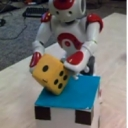

In [3]:
Image(filename='NAORelease.jpg')

### 1. Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg". As a feature vector use RGB-representation of each pixel from the image. Refer slide no-24 from MOGandEM.pdf (4th lecture)[30 points]

1. Initialization: pick K arbitrary centroids (cluster means)
2. Assign each sample to the closest centroid.
3. Adjust the centroids to be the means of the samples assigned to them.
4. Go to step 2 (until no change)

Kmeans clustering
For K=4 clusters with 5 iterations manual K-means took 3.5661468505859375 seconds 


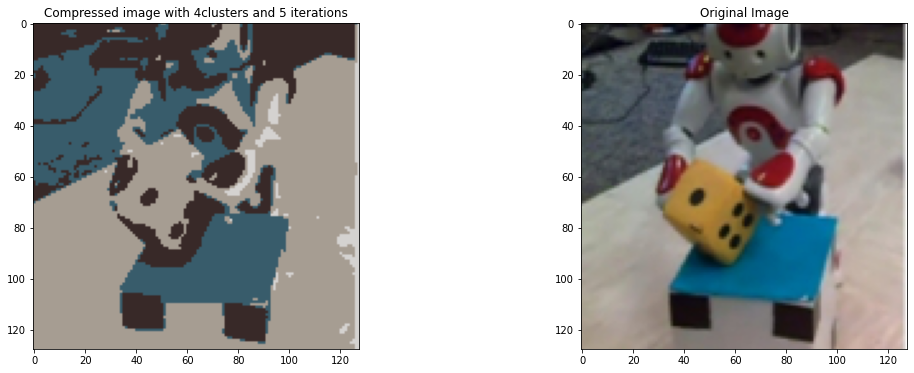

For K=4 clusters with 10 iterations manual K-means took 6.6652891635894775 seconds 


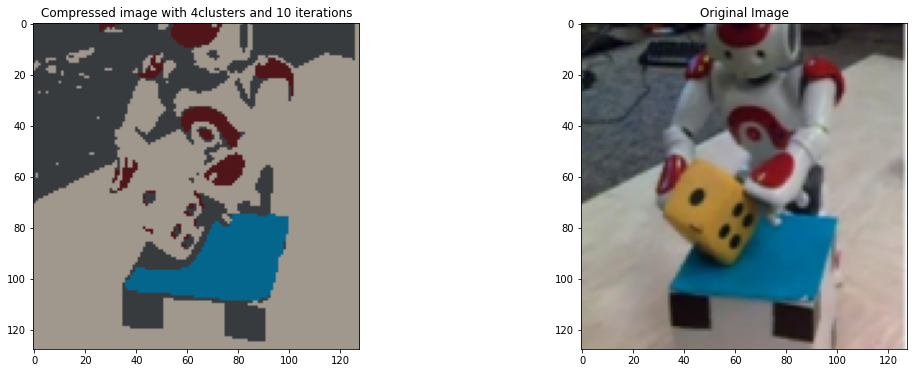

For K=4 clusters with 15 iterations manual K-means took 9.886287450790405 seconds 


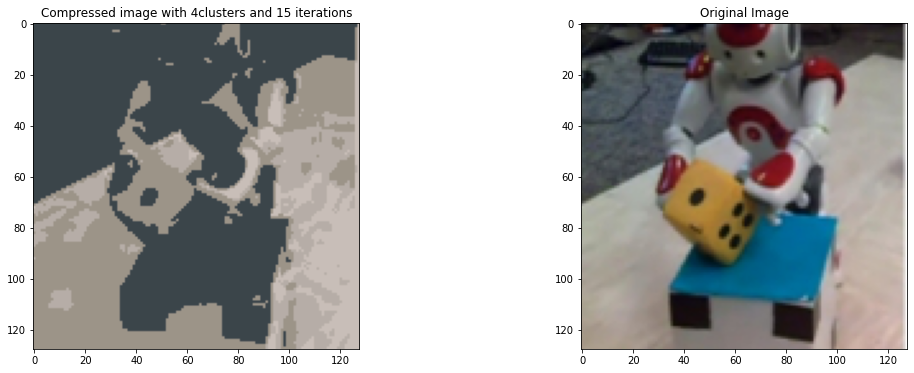

For K=8 clusters with 5 iterations manual K-means took 6.293373107910156 seconds 


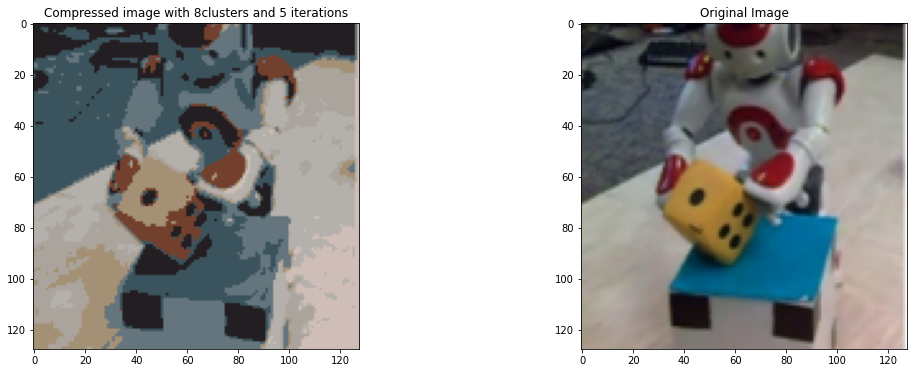

For K=8 clusters with 10 iterations manual K-means took 13.707563877105713 seconds 


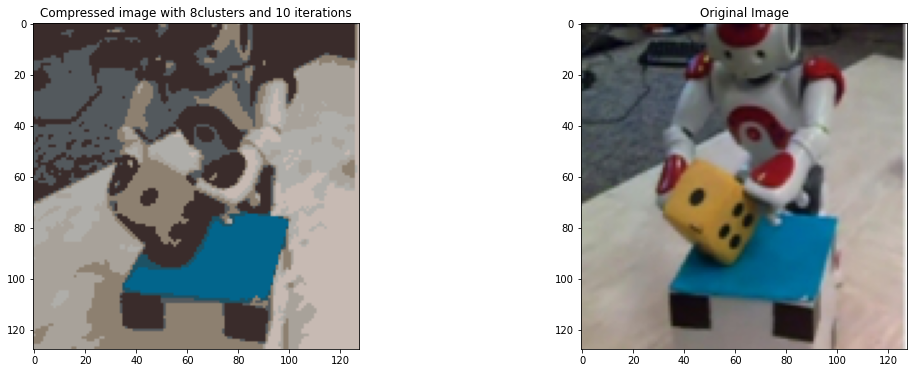

For K=8 clusters with 15 iterations manual K-means took 22.2629292011261 seconds 


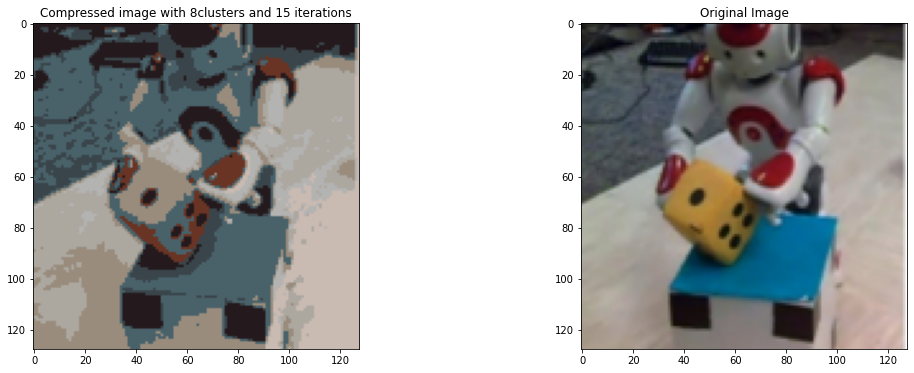

For K=16 clusters with 5 iterations manual K-means took 13.634729385375977 seconds 


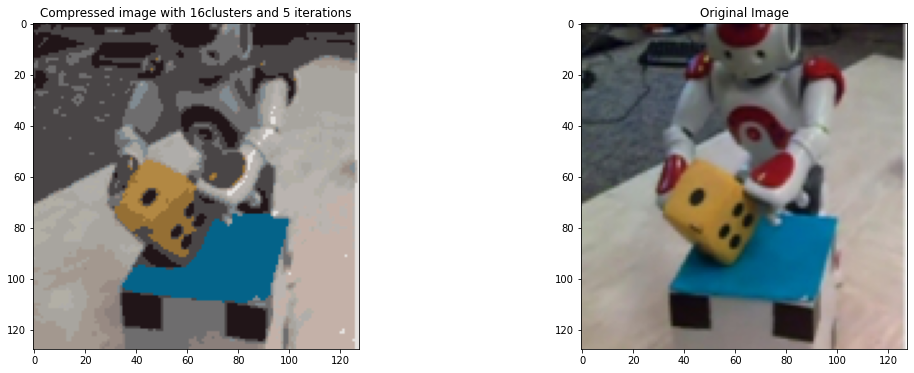

For K=16 clusters with 10 iterations manual K-means took 23.8031747341156 seconds 


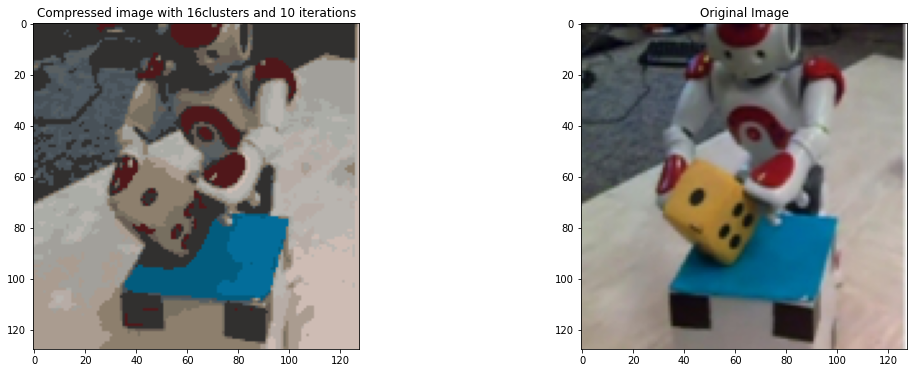

For K=16 clusters with 15 iterations manual K-means took 34.99355101585388 seconds 


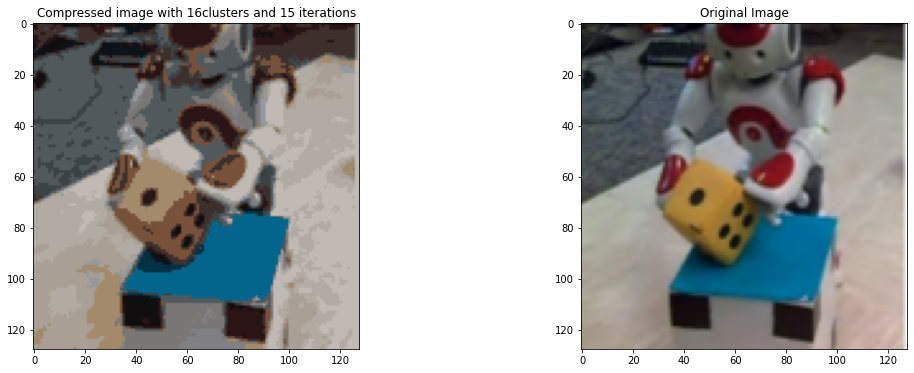

For K=32 clusters with 5 iterations manual K-means took 24.97139000892639 seconds 


For K=32 clusters with 10 iterations manual K-means took 49.297019720077515 seconds 


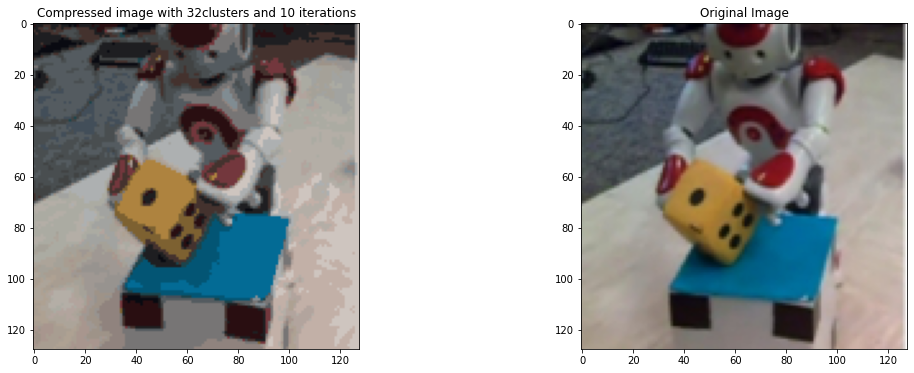

For K=32 clusters with 15 iterations manual K-means took 73.4317512512207 seconds 


In [4]:
def sampleClosestCentroid(img,centroids,k):
    '''
    Find the distance from each pixel to each centroid and find the index of 
    the centroid with minimum distance to pixel
    
    Parametes
    --------------
    img: flattended image
    centroid: values and index of current centroids(cluster means)
    k: no of clusters
    
    
    Return
    -------
    cluster_index: index of the closest centroid
    '''
    
    
     ## No of clusters   
    cluster_index=np.zeros((len(img),1))
 
    
    #Interate through all pixels
    for i in range(len(img)):
        ##Create an array to store all distance data of the colours
        distance_to_centroid=np.zeros((1,k))
        
        ##Interate thoigh all clusters
        for j in range(k):
            distance_to_centroid[:,j] =np.sqrt(np.sum(np.power((img[i,:]-centroids[j,:]),2)))
            
            
        cluster_index[i] = np.argmin(distance_to_centroid)+1    
    
    
    return cluster_index

def adjustCentroidsMean(img,indexes,k):
    '''
    Find the new means using current clustresed data
    
    '''
    
    m,n = img.shape
    centroids = np.zeros((k,img.shape[1]))
    count = np.zeros((k,1))
   
    for i in range(m):
        current_index = int(indexes[i]-1.0)           
        centroids[current_index,:] += img[i,:]
        count[current_index]+=1
    new_centroids=centroids/count
    
    
    return new_centroids

def kMeansClustering(img,centroid,max_iter,k):
    idx =sampleClosestCentroid(img,centroid,k)
    
    while (max_iter>0):
        comp_centroid = adjustCentroidsMean(img,idx,k)
        comp_idx = sampleClosestCentroid(img,centroid,k)
        max_iter=max_iter-1
        
#     print(f'IN Kmeans clsutering centroid,idx {comp_centroid.shape} and {comp_idx.shape} ')
        
    return comp_centroid,comp_idx

def compressImage(img,comp_centriod,comp_idx,k,original_shape):
    #Function to compress the image and display
    
    
    img_compressed = img.copy()
#     print(f'img_compressed {img_compressed.shape} comp_idx{comp_idx.shape} comp_centriod{comp_centriod.shape}')
    
    for i in range(1,k+1):
        img_compressed[(comp_idx == i).ravel(),:] = comp_centriod[i-1]
        
    img_compressed=img_compressed.reshape(original_shape[0],original_shape[1],original_shape[2])

    return img_compressed
    
    
    
def pre_process(img):
    #Scale down for ease of calculations
    img=(img/255)
    ##Faltten to 2D matrix 
    img=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
    
    return img

def rand_centroids(img,k):
    
    '''
    Assign random centroids(mean values)
    
    Parameters
    -----------
    img: flatten img -> np.array()
    k  : number of clusters -> int
    
    
    Returns
    --------
    centroids: matrix with centroid index and their rgb values
    
    '''
    
    m,n=img.shape
    
    ##Initalise matrix to store the RGB values of k no of centroids=no of clusters
    centroids=np.zeros((k,n))
 
    
    
    for i in range(k):
        ## Assign a random index from the range 0-no of pixels(lenght of image vector) 
        ##and all its RGB values
        centroids[i]=img[np.random.randint(0,m+1),:]
        
        
    return centroids
        
    
if __name__ == '__main__': 
    
    print("Kmeans clustering")  
    
    runtime_manual=[]
   
    for k in [4,8,16,32]:
        
        for iterations in [5,10,15]: 
  
    
            img=matplotlib.image.imread('NAORelease.jpg')
            original_shape=img.shape

            start_time=time.time()
            ##Flatten and scales down
            flatten_img=pre_process(img)    
            ## Initial random centroids
            centroids=rand_centroids(flatten_img,k)
            ## Run K means algorthm to find cluster centroid and their index
            comp_centroids,comp_idx=kMeansClustering(flatten_img,centroids,iterations,k)
            ## Use cluster cenroid details to compress image

            compressed_img=compressImage(flatten_img,comp_centroids,comp_idx,k,original_shape)

            
            end_time=time.time()
            
           
            
            runtime_manual.append([k,iterations,round(end_time-start_time,3)])

            print(f'For K={k} clusters with {iterations} iterations manual K-means took {end_time-start_time} seconds ')
            Title="Compressed image with "+str(k)+"clusters and "+str(iterations)+" "+"iterations"

            plt.figure(figsize=(18, 6))
            plt.subplot(121)
            plt.imshow(compressed_img)
            plt.title(Title)
            plt.subplot(122)
            plt.imshow(img)
            plt.title("Original Image")
            plt.show()

    
    
  
    
    

### 2. What are the parameters you played around what is your inference? Hint:- See which are the changeable ones- Hyperparameters[10 points]


There are two hyperparameters we can change
- The no of clusters(colours)
- The no of iterations to perform

- The higher the number of clusters the bigger the final compressed size of the image and longer it takes to calculate

- The higher the number of iterations(assuming no of clusters are kept constant) the smoother the transition of the image 


- From the results given above we can see that doubling the no of iterations roughly double the run time(for a fixed no of clusters) and similarly doubling the no of clusters double the run time for a fixed no of iterations 

- The plots given below are proof of this

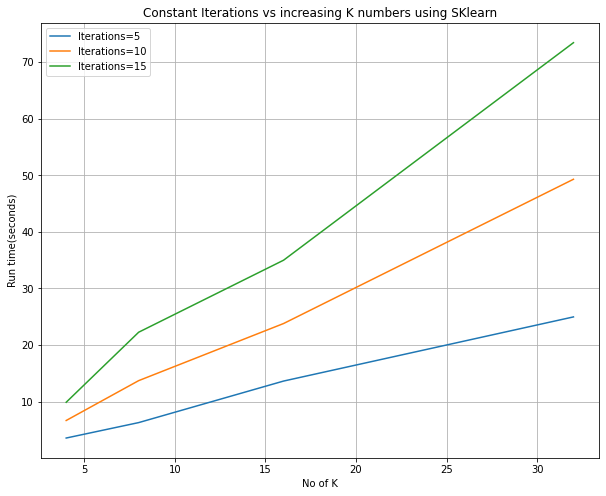

In [7]:
plot_values=np.asarray(runtime_manual)

plt.figure(figsize=(10,8))
plt.plot(plot_values[[0,1,2],1],plot_values[[0,1,2],2],label="K=4")
plt.plot(plot_values[[3,4,5],1],plot_values[[3,4,5],2],label="K=8")
plt.plot(plot_values[[6,7,8],1],plot_values[[6,7,8],2],label="K=16")
plt.plot(plot_values[[9,10,11],1],plot_values[[9,10,11],2],label="K=32")
plt.title("Constant K number vs increasing iterations using SKlearn")
plt.xlabel("No of iterations")
plt.ylabel("Run time(seconds)")
plt.grid()
plt.legend()
# print(plot_values[[0,1,2],0])

plt.figure(figsize=(10,8))
plt.plot(plot_values[[0,3,6,9],0],plot_values[[0,3,6,9],2],label="Iterations=5")
plt.plot(plot_values[[1,4,7,10],0],plot_values[[1,4,7,10],2],label="Iterations=10")
plt.plot(plot_values[[2,5,8,11],0],plot_values[[2,5,8,11],2],label="Iterations=15")

plt.title("Constant Iterations vs increasing K numbers using SKlearn")
plt.xlabel("No of K")
plt.ylabel("Run time(seconds)")
plt.legend()
plt.grid()


plt.show()

### 3. Compare your implementation with the existing k-mean algorithm given in sklearn. e.g running time[10 points]

For K=4 clusters and 5 iterations Sklearn K-means took 0.7786612510681152 seconds 


For K=4 clusters and 10 iterations Sklearn K-means took 1.538562297821045 seconds 


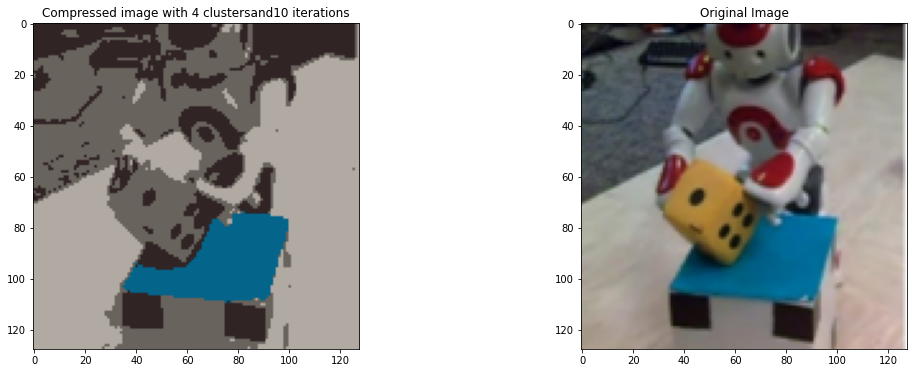

For K=4 clusters and 15 iterations Sklearn K-means took 2.4601032733917236 seconds 


For K=8 clusters and 5 iterations Sklearn K-means took 0.8116302490234375 seconds 


For K=8 clusters and 10 iterations Sklearn K-means took 1.5133676528930664 seconds 


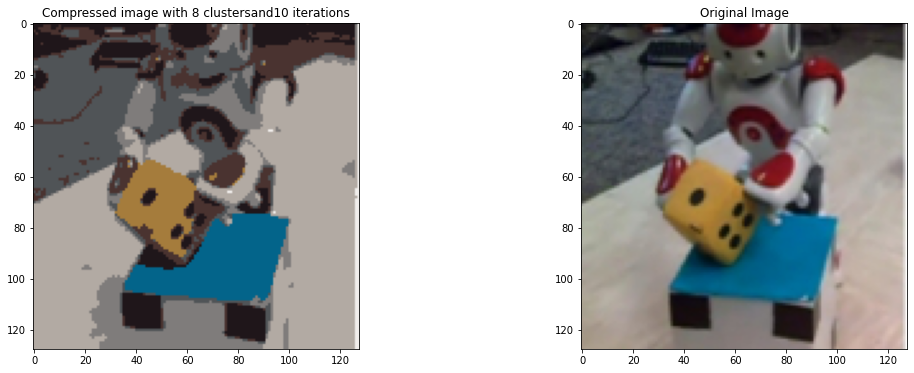

For K=8 clusters and 15 iterations Sklearn K-means took 2.370757818222046 seconds 


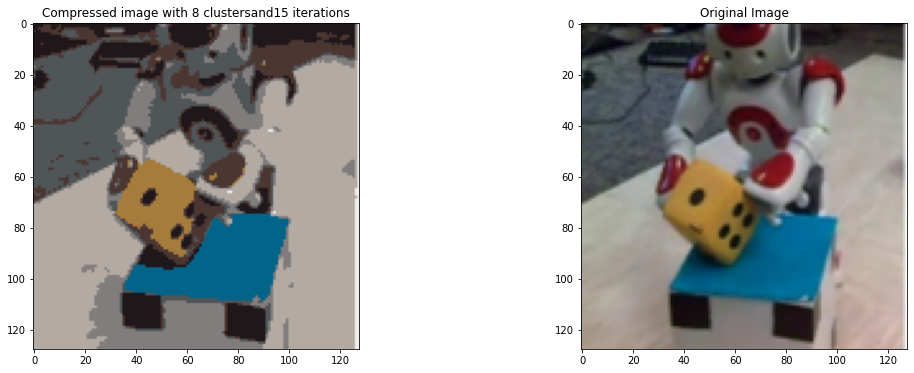

For K=16 clusters and 5 iterations Sklearn K-means took 0.9708640575408936 seconds 


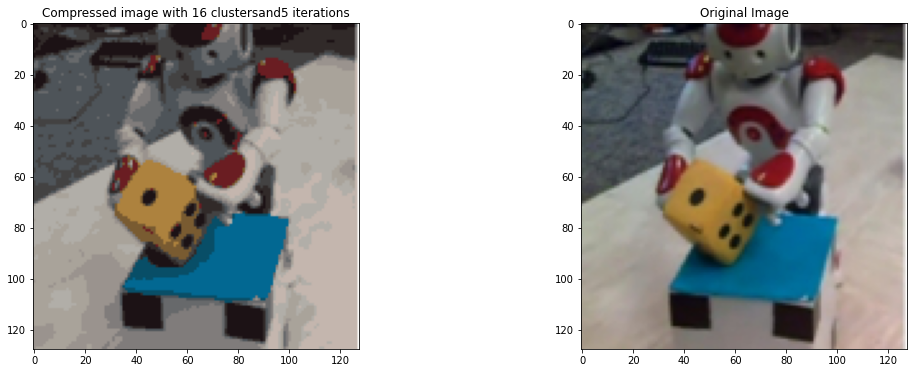

For K=16 clusters and 10 iterations Sklearn K-means took 1.9621491432189941 seconds 


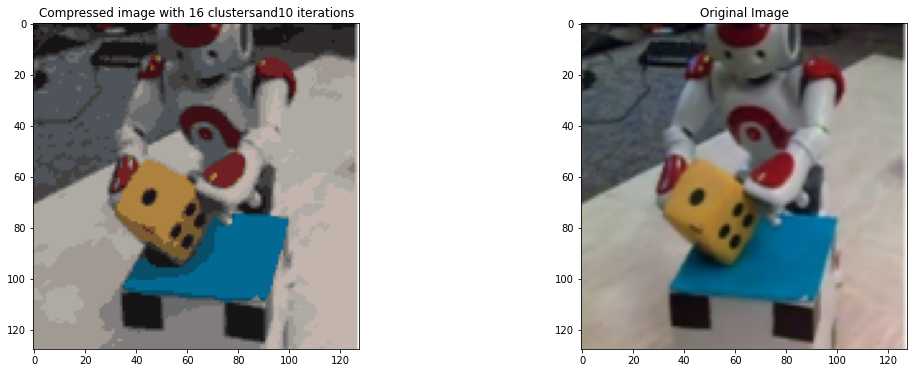

For K=16 clusters and 15 iterations Sklearn K-means took 2.5729849338531494 seconds 


For K=32 clusters and 5 iterations Sklearn K-means took 1.1267375946044922 seconds 


For K=32 clusters and 10 iterations Sklearn K-means took 2.0471956729888916 seconds 


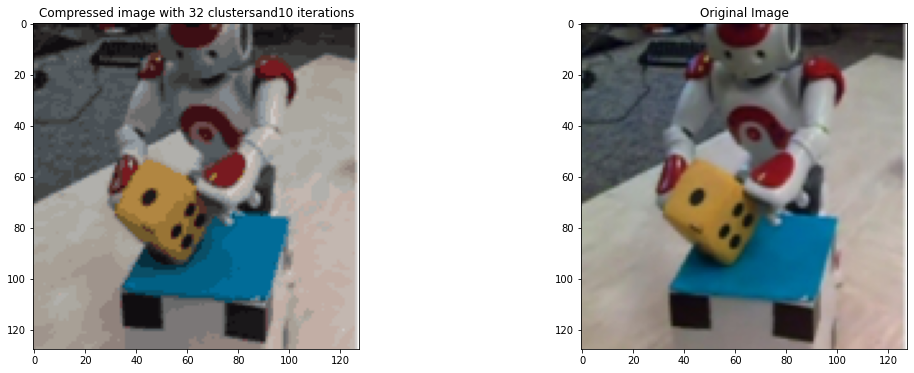

For K=32 clusters and 15 iterations Sklearn K-means took 2.860279083251953 seconds 


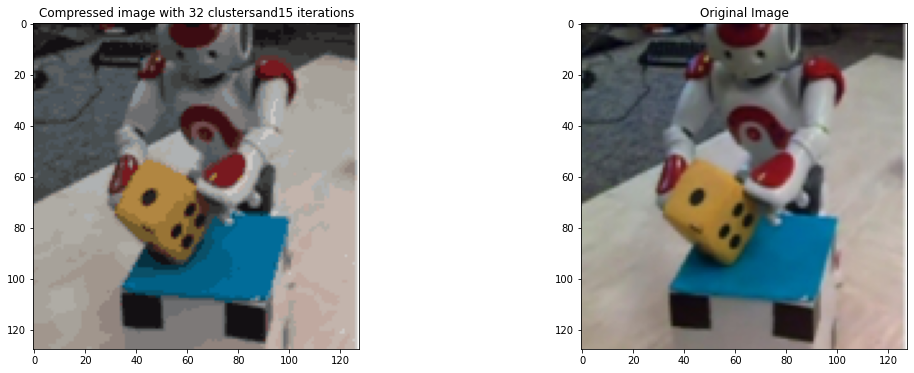

In [8]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

img_sklearn=matplotlib.image.imread('NAORelease.jpg')



max_iters=30

run_time_sklearn=[]

for k in [4,8,16,32]:
    
    for iters in [5,10,15]:

        img_sklearn=matplotlib.image.imread('NAORelease.jpg')
        start_time=time.time()
        flat_image=img_sklearn.reshape(-1,3) 


        compressor=KMeans(n_clusters=k, n_init=iters, max_iter=max_iters)
        compressor.fit(flat_image)
        pixel_centroid = np.array([list(compressor.cluster_centers_[label]) for label in compressor.labels_])
        pixel_centroid = pixel_centroid.astype("uint8")
        pixel_centroids_reshaped = np.reshape(pixel_centroid, (img_sklearn.shape[0],img_sklearn.shape[1], 3), "C")
        end_time=time.time()

        print(f'For K={k} clusters and {iters} iterations Sklearn K-means took {end_time-start_time} seconds ')
        Title="Compressed image with "+str(k)+" clusters"+"and"+str(iters)+" iterations"

        run_time_sklearn.append([k,iters,round(end_time-start_time,3)])

        #Plotting the compressed and original image

        plt.figure(figsize=(18, 6))
        plt.subplot(121)
        plt.imshow(pixel_centroids_reshaped)
        plt.title(Title)
        plt.subplot(122)
        plt.imshow(img_sklearn)
        plt.title("Original Image")
        plt.show()







##References
#https://analyticsindiamag.com/beginners-guide-to-image-compression-using-k-means-clustering/
# https://www.kaggle.com/stefanjaro/image-compression-with-k-means-clustering
#https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/
#https://www.youtube.com/watch?v=RaTve-ddaps

In [9]:
plot_values_sk=np.asarray(run_time_sklearn)

plt.figure(figsize=(10,8))
plt.plot(plot_values_sk[[0,1,2],1],plot_values_sk[[0,1,2],2],label="K=4")
plt.plot(plot_values_sk[[3,4,5],1],plot_values_sk[[3,4,5],2],label="K=8")
plt.plot(plot_values_sk[[6,7,8],1],plot_values_sk[[6,7,8],2],label="K=16")
plt.plot(plot_values_sk[[9,10,11],1],plot_values_sk[[9,10,11],2],label="K=32")
plt.title("Constant K number vs increasing iterations using SKlearn")
plt.xlabel("No of iterations")
plt.ylabel("Run time(seconds)")
plt.grid()
plt.legend()
# print(plot_values[[0,1,2],0])

plt.figure(figsize=(10,8))
plt.plot(plot_values_sk[[0,3,6,9],0],plot_values_sk[[0,3,6,9],2],label="Iterations=5")
plt.plot(plot_values_sk[[1,4,7,10],0],plot_values_sk[[1,4,7,10],2],label="Iterations=10")
plt.plot(plot_values_sk[[2,5,8,11],0],plot_values_sk[[2,5,8,11],2],label="Iterations=15")

plt.title("Constant Iterations vs increasing K numbers using SKlearn")
plt.xlabel("No of K")
plt.ylabel("Run time(seconds)")
plt.legend()


plt.show()

The Sklearn library process the data much faster than the manually programmed but it follows a simmilar pattern as mentioned above of increasing run time by changing the hyperparametes no of clusters and iterations. The reason it process much faster should be due to better data structure management. In the manual method the array images get passed between many functions . Rather than that putting it in class would have been better. 

In [12]:
plt.figure(figsize=(10,8))
plt.plot(plot_values_sk[[0,1,2],1],plot_values_sk[[0,1,2],2],label="K=4 Sk_learn")
plt.plot(plot_values_sk[[3,4,5],1],plot_values_sk[[3,4,5],2],label="K=8 Sk_learn")
plt.plot(plot_values_sk[[6,7,8],1],plot_values_sk[[6,7,8],2],label="K=16 Sk_learn")
plt.plot(plot_values_sk[[9,10,11],1],plot_values_sk[[9,10,11],2],label="K=32 Sk_learn")
plt.plot(plot_values[[0,1,2],1],plot_values[[0,1,2],2],label="K=4 Manual")
plt.plot(plot_values[[3,4,5],1],plot_values[[3,4,5],2],label="K=8 Manual")
plt.plot(plot_values[[6,7,8],1],plot_values[[6,7,8],2],label="K=16 Manual")
plt.plot(plot_values[[9,10,11],1],plot_values[[9,10,11],2],label="K=32 Manual")
plt.title("Constant K number vs increasing iterations using SKlearn and Manual")
plt.xlabel("No of iterations")
plt.ylabel("Run time(seconds)")
plt.grid()
plt.legend()
# print(plot_values[[0,1,2],0])

plt.figure(figsize=(10,8))
plt.plot(plot_values_sk[[0,3,6,9],0],plot_values_sk[[0,3,6,9],2],label="Iterations=5  Sk_learn")
plt.plot(plot_values_sk[[1,4,7,10],0],plot_values_sk[[1,4,7,10],2],label="Iterations=10 Sk_learn")
plt.plot(plot_values_sk[[2,5,8,11],0],plot_values_sk[[2,5,8,11],2],label="Iterations=15 Sk_learn")
plt.plot(plot_values[[0,3,6,9],0],plot_values[[0,3,6,9],2],label="Iterations=5 Manual")
plt.plot(plot_values[[1,4,7,10],0],plot_values[[1,4,7,10],2],label="Iterations=10 Manual")
plt.plot(plot_values[[2,5,8,11],0],plot_values[[2,5,8,11],2],label="Iterations=15 Manual")

plt.title("Constant Iterations vs increasing K numbers using SKlearn and Manual")
plt.xlabel("No of K")
plt.ylabel("Run time(seconds)")
plt.legend()
plt.grid()


plt.show()

# Task 2: Mixture of Gaussian, EM-Algorithm[50 points]

### Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:



- Follow the technical advises given in the lecture, namely run first k-means for the first 10-100 iterations (if required for the built in function its takes care by itself)
- Check if you need to add regularisation 
- Plot 
    1. Initial distribution - All the points should have same color.
    2. Soft assignment -  Assign the data points to the particular cluster only if their probability is above 0.9 others are to be considered as outliers. So give different color for all the outliers and clusters as shown in the second plot of the image (You should explore the way to do this).
    3. Hard assignment -  Each cluster should have different colors here you won't have outliers since the neighbouring datapoints are assigned to some clusters.
   
- All the clusters should have ellipsoids of three standard deviation. Kindly replicate the scene given in the image.

**Use sklearn**

**Image is given only for dataset1, dataset2 the procedure is same so you should get the right plot.

## Dataset 1[35 points]

In [13]:
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    

Found 94 probs below threshold


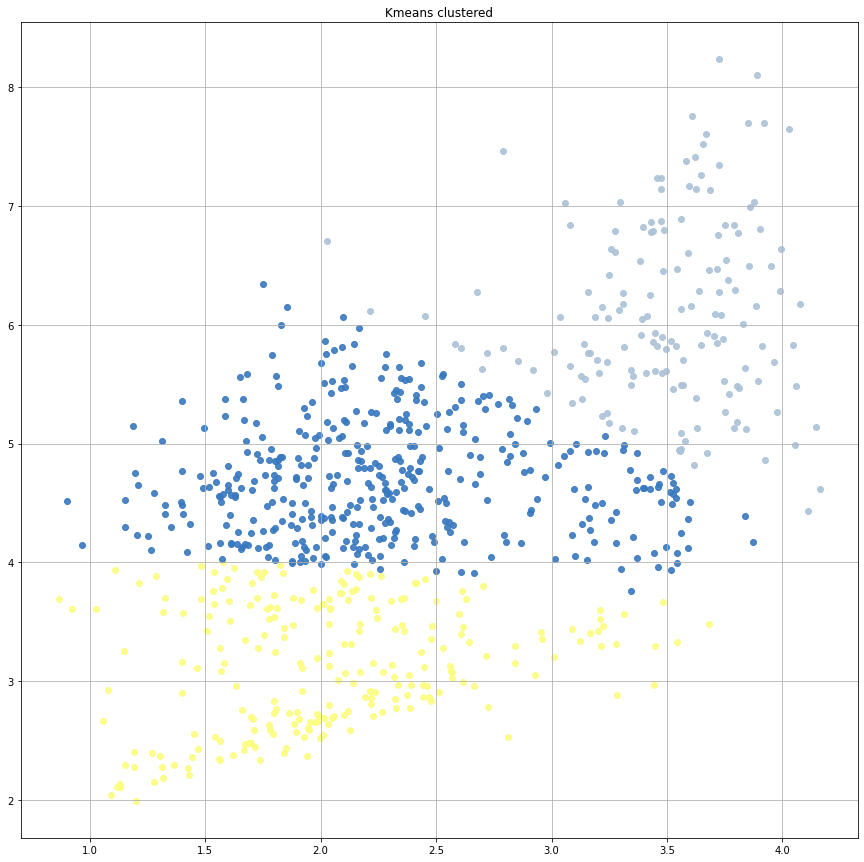

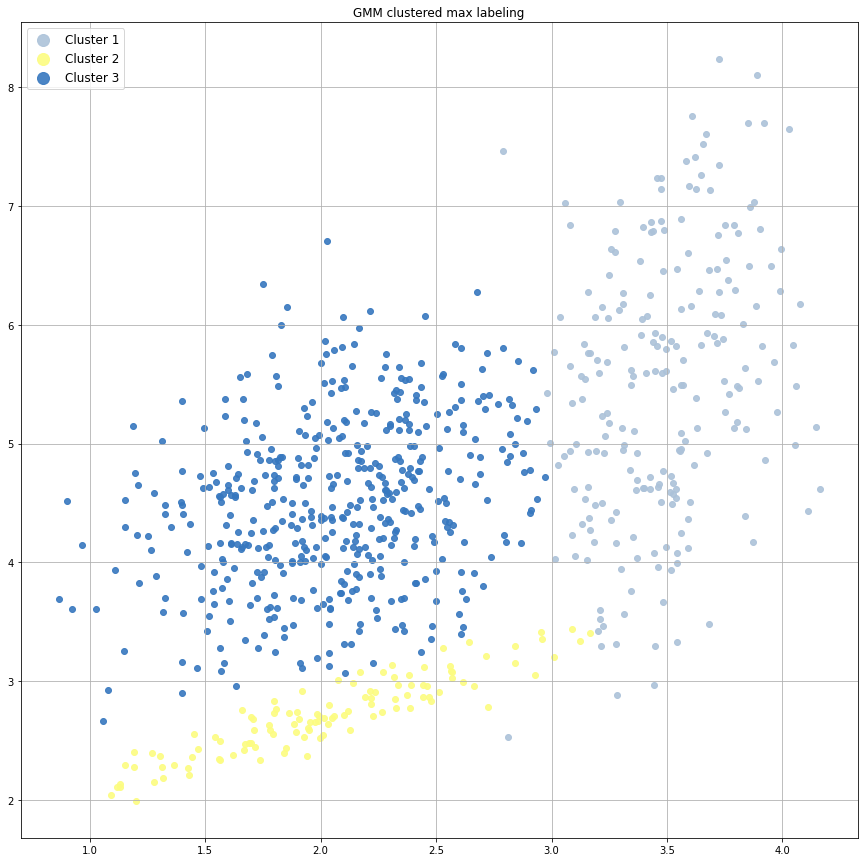

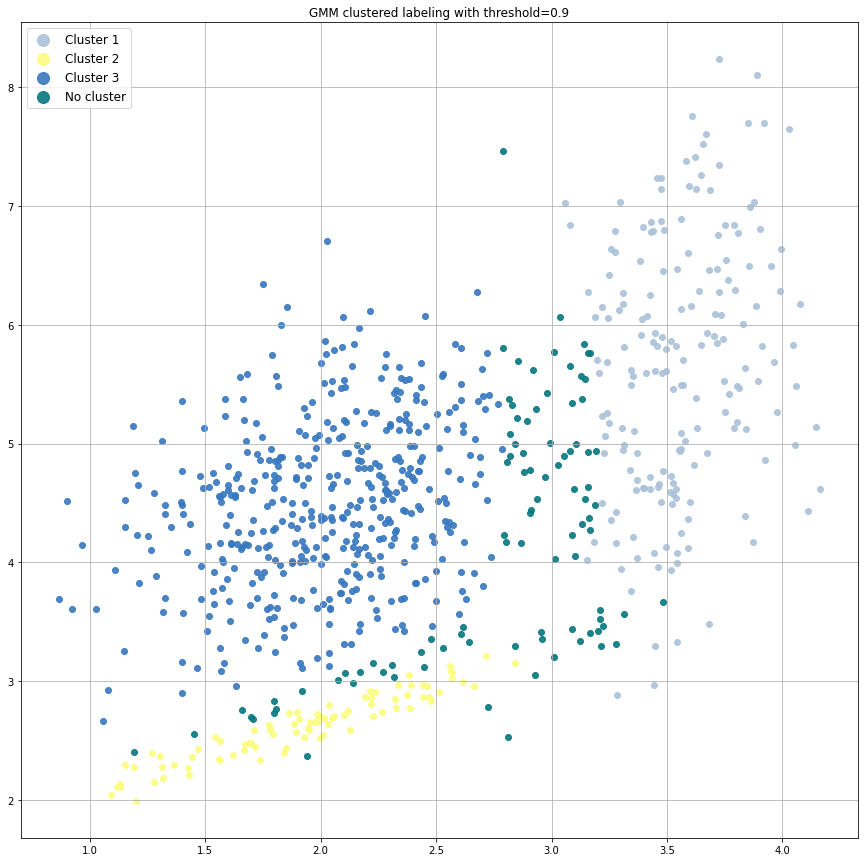

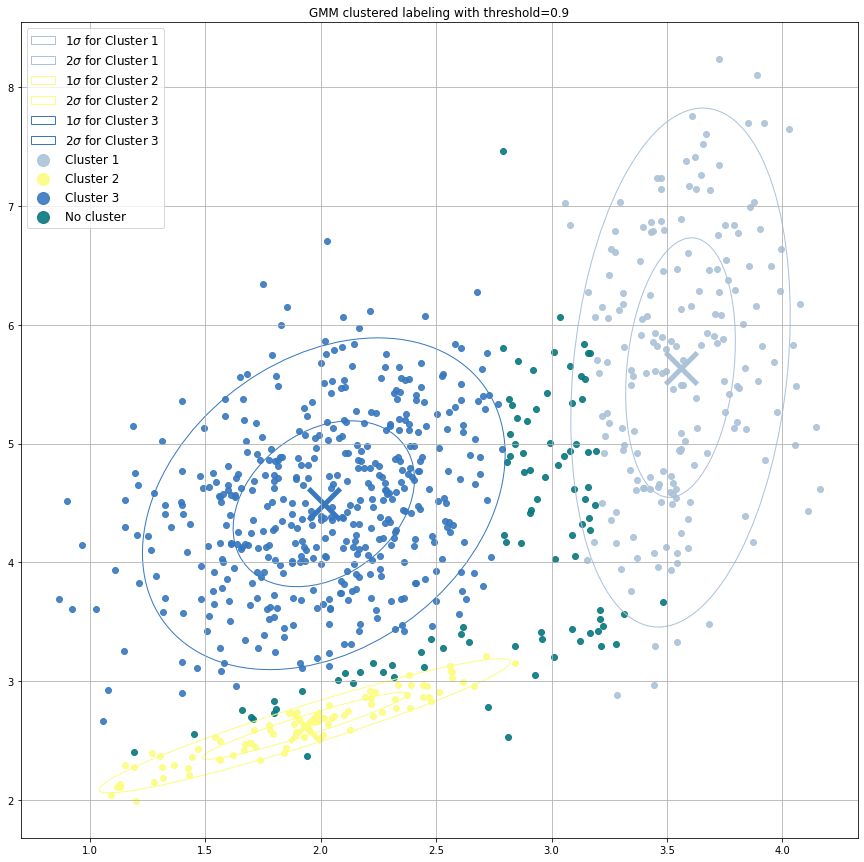

In [14]:
def get_color(index):
    color_mapping = matplotlib.colors.get_named_colors_mapping()
    color_keys = list(color_mapping.keys())
    
    return color_mapping[color_keys[index]]

def scatter_plot(*plots, title=None, labels=None, ellipses=None, centers=False):
    
    fig, ax = plt.subplots(figsize=(15,15))
    
    for index, plot in enumerate(plots):
        
        x = [d[0] for d in plot]
        y = [d[1] for d in plot]
        if labels:
            ax.scatter(x, y, color=get_color(index*10), label=labels[index], alpha=0.9)
            ax.legend(fontsize='large', markerscale=2.0)
        else:
            ax.scatter(x, y, color=get_color(index*10), alpha=0.9)
            
        if centers and "No" not in labels[index]:
            ax.scatter(np.mean(x), np.mean(y), color=get_color(index*10), marker='x', s=1000, linewidth=5)
    
        
    if title:
        ax.set_title(title)
        
    if ellipses:
        for ell in ellipses:
            ax.add_patch(ell)
            
        ax.legend(fontsize='large', markerscale=2.0)

            
    ax.grid()
    
    plt.plot()
        
def split_array_by_labels(data, labels):
    set_label = set(labels)
    
    dict_labels = {label: [] for label in set_label}

    for index, label in enumerate(labels):
        dict_labels[label].append(data[index])
        
    return dict_labels

def split_array_by_probas(data, probas, *, threshold=0.9):
    count_labels = len(probas[0])
    
    dict_labels = {label: [] for label in range(count_labels + 1)}
    below_threshold = 0

    for index, prob in enumerate(probas):
        
        max_prob = max(prob)

        if max_prob < threshold:
                dict_labels[count_labels].append(data[index])
                    
                below_threshold += 1
                continue
                       
        for label in range(count_labels):
            
            if prob[label] == max_prob:
                dict_labels[label].append(data[index])
                continue
                
    print(f"Found {below_threshold} probs below threshold")
    return dict_labels

def calculate_ellipses(data, *, color="black", count=2, label="Cluster"):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    
    ellipses = []
    covariance_matrix = np.cov(x, y)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    # decreasing by eigen value size 
    order = eigen_values.argsort()[::-1]
 
    ordered_eigen_values = eigen_values[order]
    ordered_eigen_vectors = eigen_vectors[:, order]
    
    theta = np.degrees(np.arctan2(*ordered_eigen_vectors[:,0][::-1]))
    
    for std_range in range(1, count+1):
        width, height = 2 * std_range * np.sqrt(ordered_eigen_values)
        ell = Ellipse(xy=(np.mean(x), np.mean(y)), 
                     width=width, height=height, angle=theta,
                     color=color, 
                     label=f"${std_range}\sigma$ for {label}")
        
        ell.set_facecolor("None")
        ellipses.append(ell)
        
    return ellipses

    
    
def algorithmEM(data):
    
    result = KMeans(3, max_iter=100).fit(data)
    labels = result.labels_
    km_means_splitted = [v for k,v in split_array_by_labels(data, labels).items()]


    model = GaussianMixture(3, init_params='kmeans')
    model.fit(data)

    labels = model.predict(data)
    probas = model.predict_proba(data)


    gmm_hard_labels_splitted = [v for k,v in split_array_by_labels(data, labels).items()]
    gmm_threshold_splitted = [v for k,v in split_array_by_probas(data, probas).items()]

    scatter_plot(*km_means_splitted, title="Kmeans clustered")

    scatter_plot(*gmm_hard_labels_splitted, 
                 title="GMM clustered max labeling",
                 labels=["Cluster 1", "Cluster 2", "Cluster 3"])      

    scatter_plot(*gmm_threshold_splitted, 
                 title="GMM clustered labeling with threshold=0.9",
                 labels=["Cluster 1", "Cluster 2", "Cluster 3", "No cluster"])

    ellipses_to_plot = []
    ellipses_to_plot.extend(calculate_ellipses(gmm_threshold_splitted[0], label="Cluster 1", color=get_color(0)))
    ellipses_to_plot.extend(calculate_ellipses(gmm_threshold_splitted[1], label="Cluster 2", color=get_color(10)))
    ellipses_to_plot.extend(calculate_ellipses(gmm_threshold_splitted[2], label="Cluster 3", color=get_color(20)))


    scatter_plot(*gmm_threshold_splitted, 
                 title="GMM clustered labeling with threshold=0.9",
                 labels=["Cluster 1", "Cluster 2", "Cluster 3", "No cluster"],
                 ellipses=ellipses_to_plot, centers=True)
    return probas



result = algorithmEM(data)

#### Explain the concept behind your ellipsoid plotting, like how you plotted it [5 points]

**Your explanation here**

## Dataset 2[10 points]

In [15]:
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
          np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
data = data[1:, :]

Found 94 probs below threshold


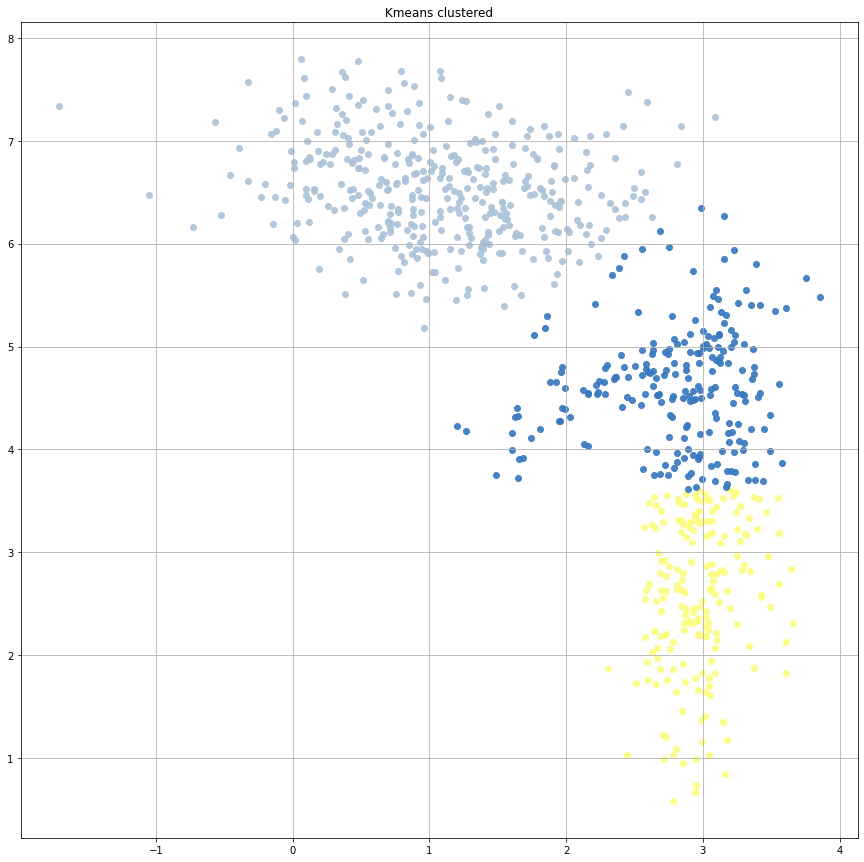

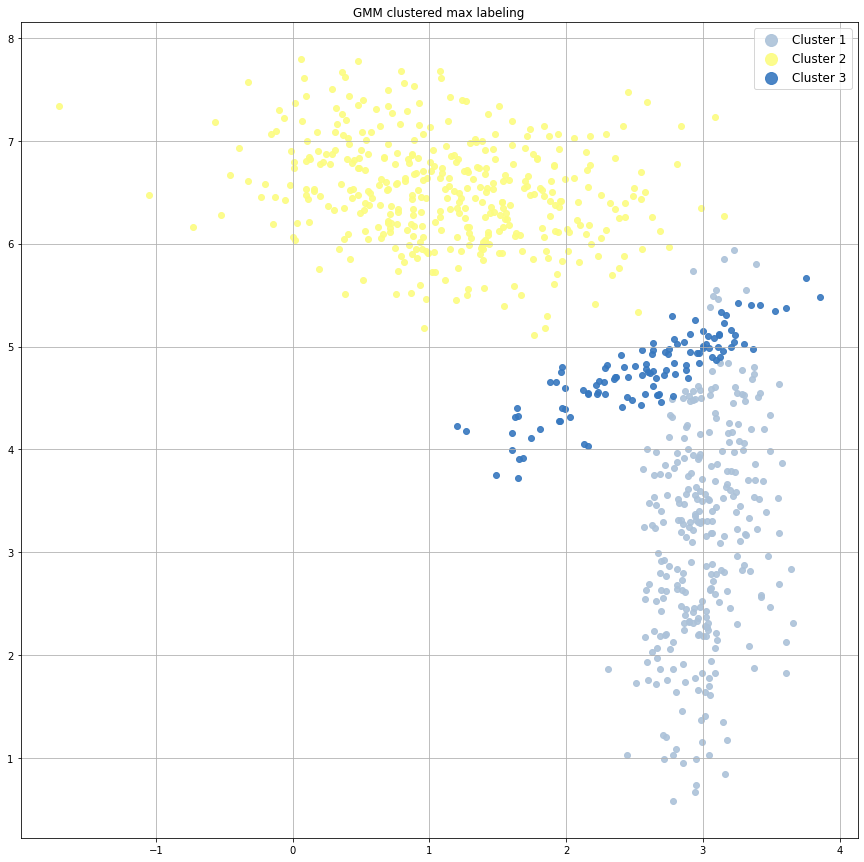

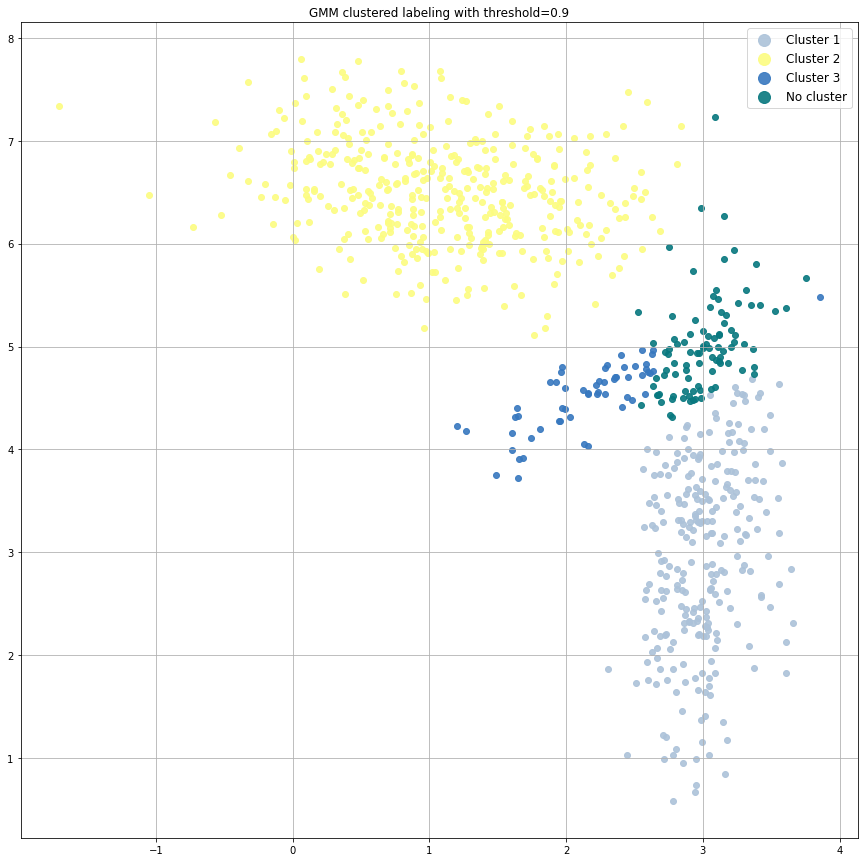

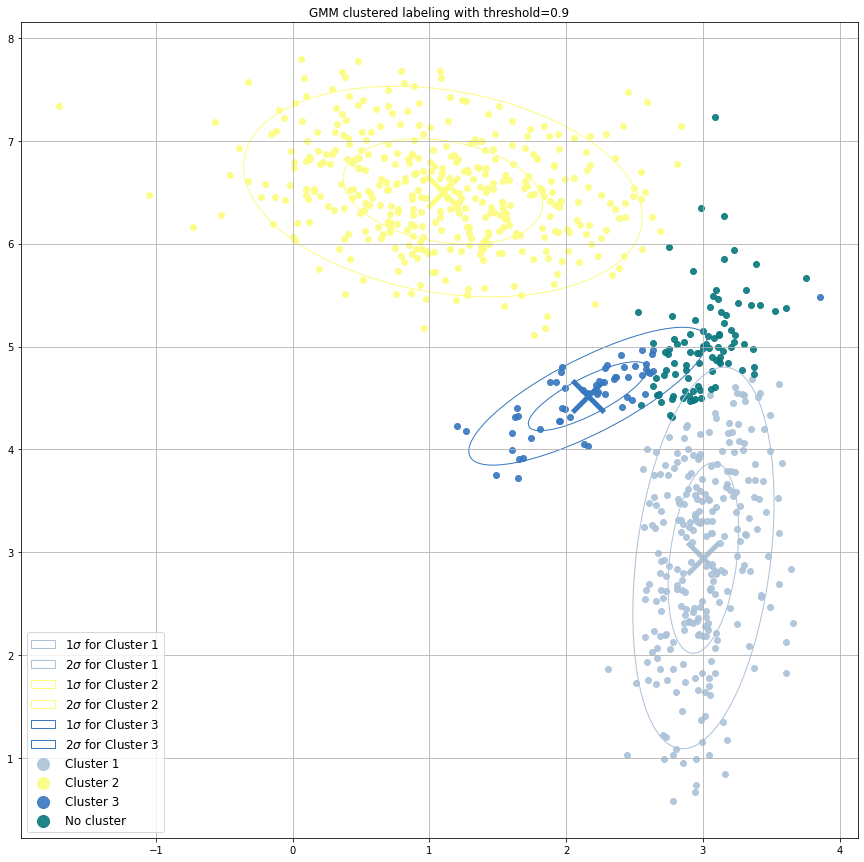

In [16]:
#### Call the function EM algorithm for dataset2
restult = algorithmEM(data)